## Customer Churn data analysis

In [1]:
#load all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\parmita.biswas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the training and testing data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# check the train data
print('Train dataframe shape: ',train_df.shape)
train_df.head()

Train dataframe shape:  (891, 9)


,CustomerID,Churn,Decile,Name,Sex,Age,Tenure,Recency,Sales
0,1,0,6,"Braund, Mr. Owen Harris",male,22.0,3,20,7.25
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,63,71.28
2,3,1,5,"Heikkinen, Miss. Laina",female,26.0,2,19,7.93
3,4,1,6,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,5,194,53.10
4,5,0,7,"Allen, Mr. William Henry",male,35.0,3,7,8.05


In [4]:
# check the test data
print('Test dataframe shape: ',test_df.shape)
test_df.head()

Test dataframe shape:  (418, 8)


,CustomerID,Decile,Name,Sex,Age,Tenure,Recency,Sales
0,892,6,"Kelly, Mr. James",male,34.5,5,133,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,4,161,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,2,92,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,1,55,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,4,178,12.2875


In [5]:
print(test_df.info())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  418 non-null    int64  
 1   Decile      418 non-null    int64  
 2   Name        418 non-null    object 
 3   Sex         418 non-null    object 
 4   Age         332 non-null    float64
 5   Tenure      418 non-null    int64  
 6   Recency     418 non-null    int64  
 7   Sales       417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None
        CustomerID      Decile         Age      Tenure     Recency       Sales
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.272727   30.272590    2.985646  100.157895   35.627188
std     120.810458    0.860691   14.181209    1.437686   58.251616   55.907576
min     892.000000    1.000000    0.170000    1.000000    1.000000    0.000000
25%     996.250000    1

#### Check missing data

In [6]:
# show missing data along with their percentage
def missing_data(df):
    nullvalues = df.isnull()
    total_missing = nullvalues.sum().sort_values(ascending=False)
    total_missing_percentage = nullvalues.sum()/nullvalues.count()*100
    total_missing_percentage = (round(total_missing_percentage,1)).sort_values(ascending=False)
    missing_data = pd.concat([total_missing,total_missing_percentage],axis=1,keys=['Total','%'])
    return missing_data

In [7]:
print('------Missing train data---')
missing_data(train_df)

------Missing train data---


,Total,%
Age,177,19.9
Sales,0,0.0
Recency,0,0.0
Tenure,0,0.0
Sex,0,0.0
Name,0,0.0
Decile,0,0.0
Churn,0,0.0
CustomerID,0,0.0


In [8]:
print('------Missing test data---------')
missing_data(test_df)

------Missing test data---------


,Total,%
Age,86,20.6
Sales,1,0.2
Recency,0,0.0
Tenure,0,0.0
Sex,0,0.0
Name,0,0.0
Decile,0,0.0
CustomerID,0,0.0


Mostly we have missing data in age column which we have to deal with later.

### Exploratory data analysis

0    549
1    342
Name: Churn, dtype: int64

So, total 61.62% passenger didnt Churn.


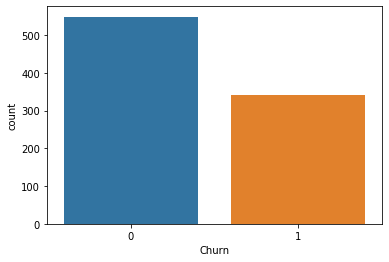

In [9]:
# check how many passengers (not)churned from the given dataseta along with their percentage
print(train_df['Churn'].value_counts())
Churn = "{:.2f}".format(train_df['Churn'].value_counts(normalize=True)[0]*100)

sns.countplot(train_df['Churn'])
print('\nSo, total '+Churn +'% passenger didnt Churn.')

In [10]:
# this function is used to compare (not)churned based on a selective feature
def visualize_data(feature):
    plt.subplots(figsize = (10,10))
    ax=sns.countplot(x=feature,hue='Churn',data=train_df)
    plt.title("churn vs Non-churn by "+feature, fontsize = 25)
    leg=ax.get_legend()
    leg.set_title('churn')
    legs=leg.texts
    legs[0].set_text('No')
    legs[1].set_text("yes")  
    
#this function is used to print number of churned passenger by a selective feature
def print_survived_data_by_feature(data,feature):    
    print('\n\nNumber of churned passenger by '+feature+' :')
    print(data[data['Churn']==1][feature].groupby(train_df[feature]).count())
    print('\n\nNumber of churned passenger by '+feature+' :')
    print(train_df[data['Churn']==0][feature].groupby(data[feature]).count())    
    



Number of churned passenger by Decile :
Decile
1     30
2     32
3     29
4     29
5     39
6     38
7     44
8     38
9     34
10    29
Name: Decile, dtype: int64


Number of churned passenger by Decile :
Decile
1     56
2     63
3     54
4     43
5     52
6     56
7     53
8     72
9     50
10    50
Name: Decile, dtype: int64


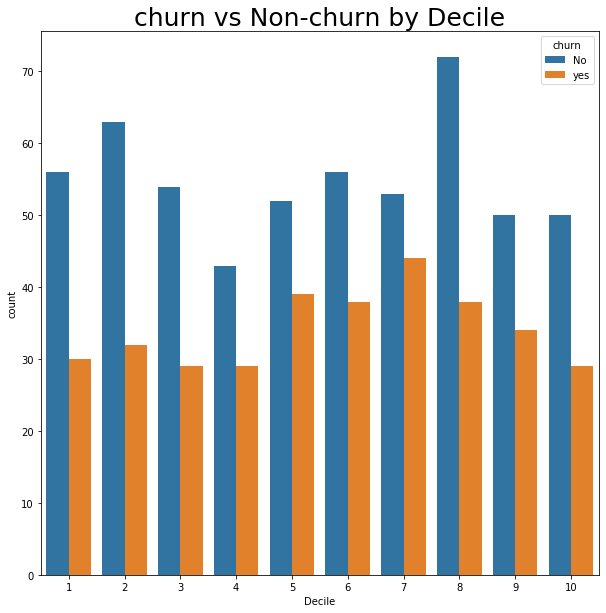

In [11]:
# Now check how many passengers (not)survived for each passenger's class
visualize_data('Decile') 
print_survived_data_by_feature(train_df,'Decile')



Number of churned passenger by Sex :
Sex
female    233
male      109
Name: Sex, dtype: int64


Number of churned passenger by Sex :
Sex
female     81
male      468
Name: Sex, dtype: int64


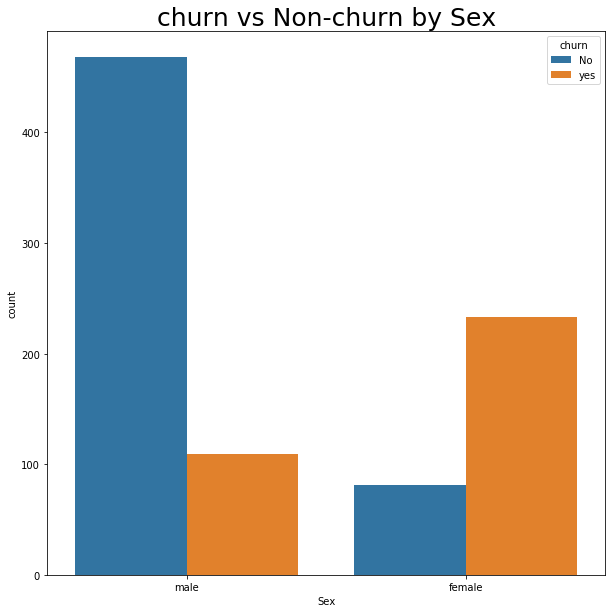

In [12]:

visualize_data('Sex')
print_survived_data_by_feature(train_df,'Sex')



Number of churned passenger by Tenure :
Tenure
1    71
2    68
3    67
4    67
5    69
Name: Tenure, dtype: int64


Number of churned passenger by Tenure :
Tenure
1    115
2    115
3    105
4    113
5    101
Name: Tenure, dtype: int64


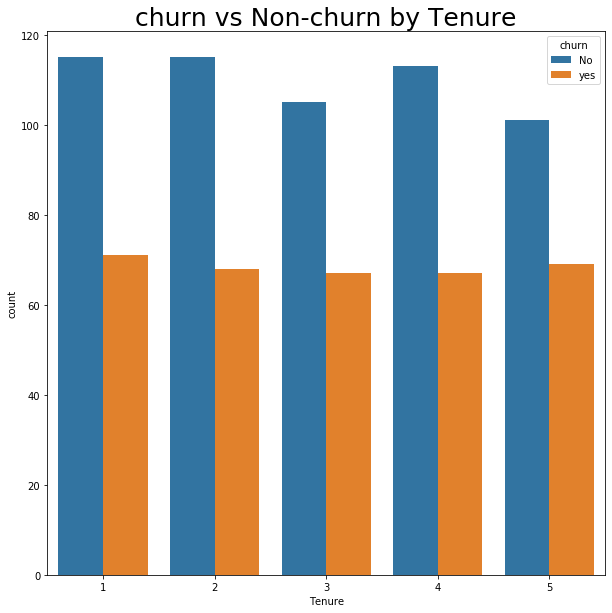

In [13]:

visualize_data('Tenure')
print_survived_data_by_feature(train_df,'Tenure')

### Feature engineering

If we see the Name column, first it might seem unnecessary for our analysis. But if we pay a closer look then we can get a necessary information from the Name colum.
It gives us the information regarding the title of the passenger and this information might be useful for our analysis.
So, we extract the title from the Name colum and make a new column named Title and remove the Name colum from the dataset.

In [14]:
#working with Name
import re
# This function is a helper function of title_feature function
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# This function is used to make a new column named 'Title' 
# which extracts the title from the 'Name' column as the title always ends with a dot(.) 
def title_feature(train_df,test_df):
    for data in [train_df,test_df]:
        data['Title'] = data['Name'].apply(extract_title)
        del data['Name']
    return train_df,test_df    

In [15]:
train_df, test_df = title_feature(train_df,test_df)

In [16]:
print('Unique Titles in train data')
print(train_df['Title'].value_counts())
print('\nUnique Titles in test data')
print(test_df['Title'].value_counts())

Unique Titles in train data
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Capt          1
Don           1
Sir           1
Ms            1
Lady          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

Unique Titles in test data
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


As we see that we have 17 unique titles but we can divide them into 5 title categories namely Mr,Miss,Mrs,Master and others.

In [17]:
# so categorize the titles
title_mapping = { "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "Master","Dr": "Others", "Rev": "Others", "Col": "Others", "Major": "Others",
                 "Mlle": "Others","Countess": "Others",
                 "Ms": "Others", "Lady": "Others", "Jonkheer": "Others",
                 "Don": "Others", "Dona" : "Others", "Mme": "Others",
                 "Capt": "Others","Sir": "Others" }
def title_binning(train_df,test_df):
    for data in [train_df,test_df]:
        data['Title'] = data['Title'].map(title_mapping)
    return  train_df,test_df   

In [18]:
train_df, test_df = title_binning(train_df,test_df)

In [19]:
print('Now we have 5 unique Titles in train data:')
print(train_df['Title'].value_counts())

Now we have 5 unique Titles in train data:
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64




Number of churned passenger by Title :
Title
Master     23
Miss      127
Mr         81
Mrs        99
Others     12
Name: Title, dtype: int64


Number of churned passenger by Title :
Title
Master     17
Miss       55
Mr        436
Mrs        26
Others     15
Name: Title, dtype: int64


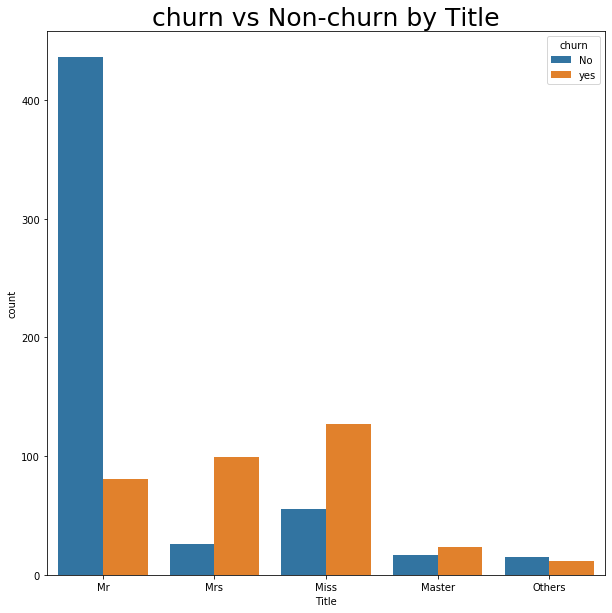

In [20]:
visualize_data('Title')
print_survived_data_by_feature(train_df,'Title')

As the 'Age' column had 177(20%) missing value, we need to fill the missing value. Instead of the total average age, we can fill the missing Age column according to their title.
As we already know their title, we can fill the missing value by grouping the title and taking the median of that title group.

In [21]:
#working with age
# This function is used to fill the missing values of age column with the median age value of respective 'Title'
def fill_missing_age(train_df,test_df):
    for data in [train_df,test_df]:
        train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
        test_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)   
    return train_df,test_df  

In [22]:
print('Before filling - Missing Age Count: '+str(train_df['Age'].isnull().sum()))
train_df, test_df = fill_missing_age(train_df,test_df)
print('After filling - Missing Age Count: '+str(train_df['Age'].isnull().sum()))

Before filling - Missing Age Count: 177
After filling - Missing Age Count: 0


In [23]:
#This function is used to make 5 bins of Age column namely 'Child','Young','Adult','Mid-age' and 'Senior'
def age_binning(train_df,test_df):    
    for data in [train_df,test_df]:
        data['Age'] =np.where(data['Age'] <=14,'Child',
                              np.where(((data['Age'] > 14) & (data['Age'] <= 22)),'Young',
                                       np.where(((data['Age'] > 22) & (data['Age'] <= 36)),'Adult',
                                                np.where(((data['Age'] > 36) & (data['Age'] <= 55)),'Mid-age','Senior'))))
    return train_df,test_df     

In [24]:
train_df, test_df = age_binning(train_df,test_df)



Number of churned passenger by Age :
Age
Adult      148
Child       47
Mid-age     60
Senior      12
Young       75
Name: Age, dtype: int64


Number of churned passenger by Age :
Age
Adult      276
Child       34
Mid-age     96
Senior      28
Young      115
Name: Age, dtype: int64


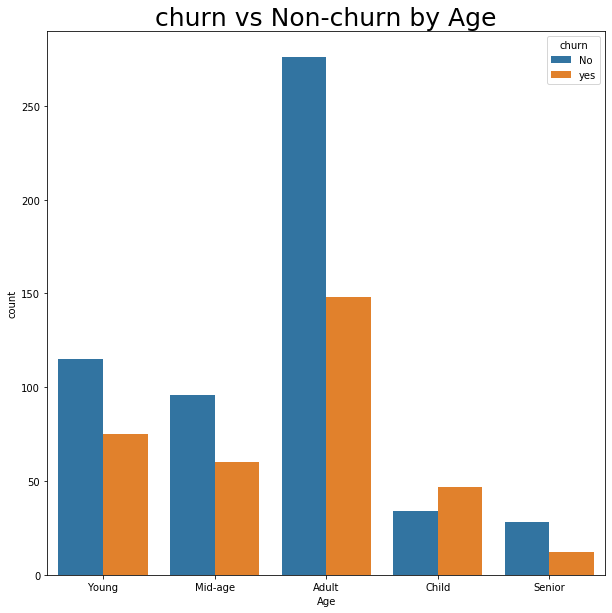

In [25]:
visualize_data('Age')
print_survived_data_by_feature(train_df,'Age')

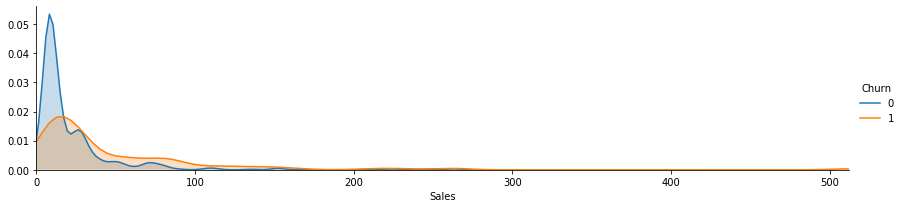

In [26]:
# check the churned data with respect of Sales column
facet = sns.FacetGrid(train_df, hue="Churn",aspect=4)
facet.map(sns.kdeplot,'Sales',shade= True)
facet.set(xlim=(0, train_df['Sales'].max()))
facet.add_legend()
#plt.xlim(0, 30)
plt.show()

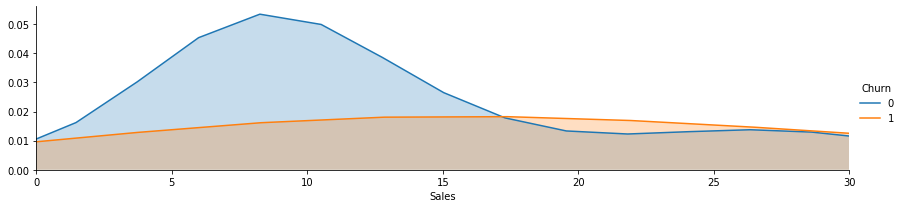

In [27]:
# we can take a closer look at the beginning of the graph (Zoom in view)
facet = sns.FacetGrid(train_df, hue="Churn",aspect=4)
facet.map(sns.kdeplot,'Sales',shade= True)
facet.set(xlim=(0, train_df['Sales'].max()))
facet.add_legend()
plt.xlim(0, 30)
plt.show()

In [28]:
def fare_binning(train_df,test_df):    
    for data in [train_df,test_df]:
        data['Sales'] =np.where(data['Sales'] <=15,'Low',
                              np.where(((data['Sales'] > 15) & (data['Sales'] <= 35)),'Medium',
                                       np.where(((data['Sales'] > 35) & (data['Sales'] <= 100)),'High','Extreme')))
    return train_df,test_df  



In [29]:
train_df, test_df = fare_binning(train_df,test_df)


In [30]:
def recency_binning(train_df,test_df):    
    for data in [train_df,test_df]:
        data['Recency'] =np.where(data['Recency'] <=50,'Extreme',
                              np.where(((data['Recency'] > 50) & (data['Recency'] <= 180)),'High',
                                       np.where(((data['Recency'] > 180) & (data['Recency'] <= 360)),'Medium','Low')))
    return train_df,test_df  

train_df, test_df = recency_binning(train_df,test_df)



Number of churned passenger by Sales :
Sales
Extreme     39
High        84
Low        114
Medium     105
Name: Sales, dtype: int64


Number of churned passenger by Sales :
Sales
Extreme     14
High        61
Low        344
Medium     130
Name: Sales, dtype: int64


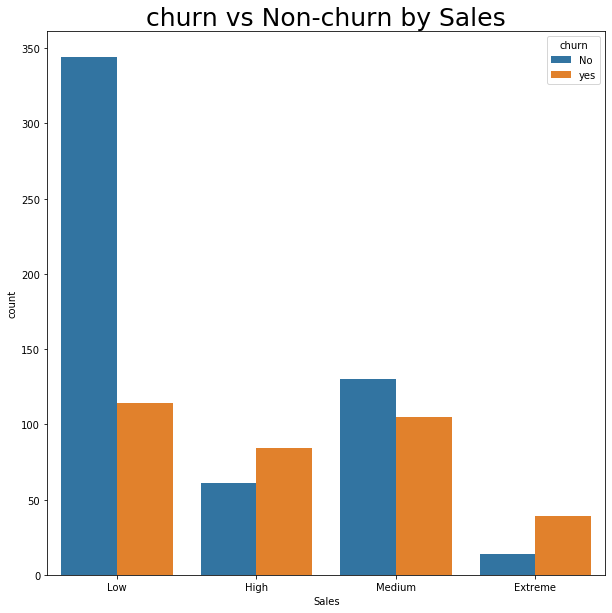

In [31]:
visualize_data('Sales')
print_survived_data_by_feature(train_df,'Sales')



Number of churned passenger by Recency :
Recency
Extreme     87
High       220
Medium      35
Name: Recency, dtype: int64


Number of churned passenger by Recency :
Recency
Extreme    144
High       348
Medium      57
Name: Recency, dtype: int64


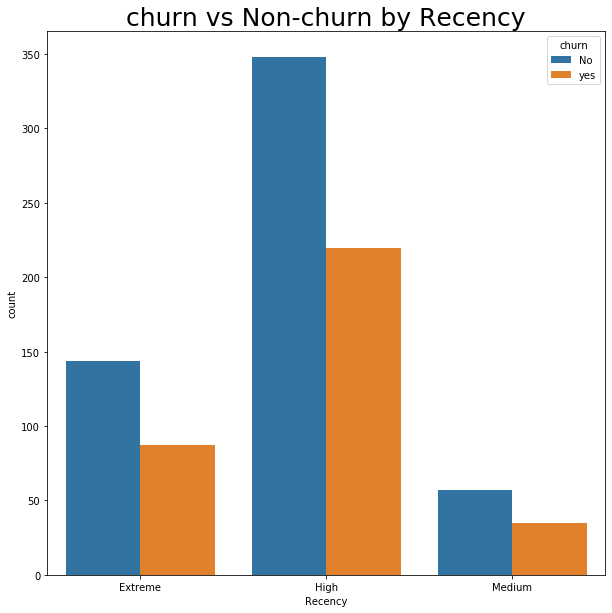

In [32]:
visualize_data('Recency')
print_survived_data_by_feature(train_df,'Recency')

In [33]:
train_df.head()

,CustomerID,Churn,Decile,Sex,Age,Tenure,Recency,Sales,Title
0,1,0,6,male,Young,3,Extreme,Low,Mr
1,2,1,3,female,Mid-age,1,High,High,Mrs
2,3,1,5,female,Adult,2,Extreme,Low,Miss
3,4,1,6,female,Adult,5,Medium,High,Mrs
4,5,0,7,male,Adult,3,Extreme,Low,Mr


In [34]:
# so now, we dont have any missing value in our dataset
train_df.isnull().sum()

CustomerID    0
Churn         0
Decile        0
Sex           0
Age           0
Tenure        0
Recency       0
Sales         0
Title         0
dtype: int64

##### Encoding categorical  values

As 'Sex' has two values(male or female) and they dont have any order.
On the otherhand, 'Age','Sales','Recency' columns have order. So, we will use ordinal encoding for these columns.

In [35]:
# this function encodes feature with ordinal encodeing where order matters  
def ordinal_encoding(feature,mapping):
    for data in [train_df,test_df]:
        data[feature] = data[feature].map(mapping)

In [36]:
# # this function encodes feature with label encodeing by creating new columns with each values
def label_encoding(feature):
    train=pd.get_dummies(train_df,columns=[feature]) #,drop_first=True
    test=pd.get_dummies(test_df,columns=[feature]) #,drop_first=True
    return train,test

In [37]:
#encoding technique one with mix(label,ordinal) encoding
#def encoding_technique_one():
#map 'Sex' column 
train_df,test_df=label_encoding('Sex')
#map 'Age' column 
ordinal_encoding('Age',{'Child':0,'Young':1,'Adult':2,'Mid-age':3,'Senior':4})

#map 'Fare' column 
ordinal_encoding('Sales',{'Low':0,'Medium':1,'High':2,'Extreme':3})
#map 'Recency' column 
ordinal_encoding('Recency',{'Low':0,'Medium':1,'High':2,'Extreme':3})

#map 'Title' column 
train_df,test_df=label_encoding('Title')


In [38]:
# NOT IN USE
#encoding technique two with ordinal encoding
def encoding_technique_two():
    #map 'Sex' column 
    ordinal_encoding('Sex',{'male':0,'female':1})
    #map 'Age' column 
    ordinal_encoding('Age',{'Child':0,'Young':1,'Adult':2,'Mid-age':3,'Senior':4})
    #map 'Fare' column 
    ordinal_encoding('Sales',{'Low':0,'Medium':1,'High':2,'Extreme':3})
    
    #map 'Title' column 
    ordinal_encoding('Title',{'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Others':4})
    #map 'Recency' column 
    ordinal_encoding('Recency',{'Low':0,'Medium':1,'High':2,'Extreme':3})

In [39]:
# NOT IN USE
#encoding technique three with label encoding
def encoding_technique_three():
    #map 'Sex' column 
    train_df,test_df=label_encoding('Sex')
    #map 'Age' column 
    train_df,test_df=label_encoding('Age')
    #map 'FamilySize' column 
    train_df,test_df=label_encoding('FamilySize')
    #map 'Pclass' column 
    train_df,test_df=label_encoding('Pclass')
    #map 'Fare' column 
    train_df,test_df=label_encoding('Fare')
    #map 'Embarked' column 
    train_df,test_df=label_encoding('Embarked')
    #map 'Title' column 
    train_df,test_df=label_encoding('Title')

In [40]:
train_df.drop(['CustomerID'],axis=1,inplace=True)
test_df.drop(['CustomerID'],axis=1,inplace=True)

In [41]:
train_df.head()

,Churn,Decile,Age,Tenure,Recency,Sales,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,6,1,3,3,0,0,1,0,0,1,0,0
1,1,3,3,1,2,2,1,0,0,0,0,1,0
2,1,5,2,2,3,0,1,0,0,1,0,0,0
3,1,6,2,5,1,2,1,0,0,0,0,1,0
4,0,7,2,3,3,0,0,1,0,0,1,0,0


### Modeling

We want to identify relationship between target varibale (CHurned or not) with other feature variables (Gender, Age, Decile etc). Our problem is a classification and regression problem.  We will apply some supervised learning model as we are training our model with a given dataset. 

    Logistic Regression
    KNN or k-Nearest Neighbors
    Support Vector Machines
    Naive Bayes classifier
    Decision Tree
    Random Forrest

In [42]:
#prepare the data
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
all_features = train_df.drop("Churn",axis=1)
target_feature = train_df["Churn"]
X_train,X_test,y_train,y_test = train_test_split(all_features,target_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 12), (268, 12), (623,), (268,))

In [43]:
# this fn is used to apply a model which will be passed as parameter and return the accuracy using that model
def apply_model(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    prediction=model.predict(xtest)
    acc = round(accuracy_score(prediction,ytest)*100,2)
    return acc

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function,

In [44]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
logitmodel = LogisticRegression()
logireg_acc=apply_model(logitmodel,X_train,X_test,y_train,y_test)
print('The accuracy of the Logistic Regression is', logireg_acc)

The accuracy of the Logistic Regression is 80.22


Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

In [116]:
#Apply  Random Forests
from sklearn.ensemble import RandomForestClassifier

randf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

randf_acc = apply_model(randf_model,X_train,X_test,y_train,y_test)
print('The accuracy of the Random Forest Classifier is', randf_acc)

The accuracy of the Random Forest Classifier is 79.48


SVM analyzes data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [117]:
# Apply SVM
from sklearn.svm import SVC, LinearSVC
svm_model = SVC()
svm_acc = apply_model(svm_model,X_train,X_test,y_train,y_test)
print('The accuracy of the Support Vector Machines Classifier is', svm_acc)

The accuracy of the Support Vector Machines Classifier is 79.1


KNN working principle is described below:
    A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [118]:
#Apply knn
from sklearn.neighbors import KNeighborsClassifier

knn_acc = apply_model(KNeighborsClassifier(n_neighbors = 4),X_train,X_test,y_train,y_test)
print('The accuracy of the K Nearst Neighbors Classifier is', knn_acc)

The accuracy of the K Nearst Neighbors Classifier is 73.51


Decision tree maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [119]:
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtree_acc = apply_model(dtree_model,X_train,X_test,y_train,y_test)
print('The accuracy of the DecisionTree Classifier is', dtree_acc)

The accuracy of the DecisionTree Classifier is 74.25


In [120]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Support Vector Machines', 'KNN', 
               'DecisionTree Classifier'],
    'Score': [logireg_acc, randf_acc, svm_acc, 
              knn_acc, dtree_acc]})
models = models.sort_values(by='Score', ascending=False)
models = models.set_index('Score')
models

,Model
Score,
80.22,Logistic Regression
79.48,Random Forest
79.10,Support Vector Machines
74.25,DecisionTree Classifier
73.51,KNN


##### Save the model for deployment

In [121]:

import pickle
pickle.dump(logitmodel,open('logitmodel.pkl','wb'))

##### Now, we will use our test data applying the best performed model 

Total churned from test data 156 out of 418 (37.32%)


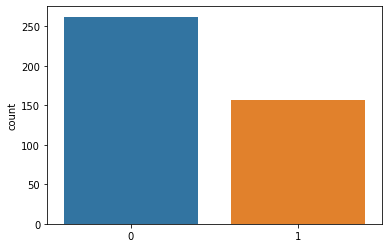

In [122]:
# Apply Logistic
logistic_prediction=logitmodel.predict(test_df)
churned = np.count_nonzero(logistic_prediction)
total = logistic_prediction.size
print('Total churned from test data '+str(churned)+' out of '+str(total)+' ('+str(round((churned/total)*100,2))+'%)')
sns.countplot(logistic_prediction)

KeyError: 1

In [46]:
test_df

,Decile,Age,Tenure,Recency,Sales,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,6,2,5,2,0,0,1,0,0,1,0,0
1,3,3,4,2,0,1,0,0,0,0,1,0
2,2,4,2,2,0,0,1,0,0,1,0,0
3,3,2,1,2,0,0,1,0,0,1,0,0
4,3,1,4,2,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,2,2,2,0,0,1,0,0,1,0,0
414,1,3,2,3,3,1,0,0,0,0,0,1
415,3,3,5,1,0,0,1,0,0,1,0,0
416,3,2,3,1,0,0,1,0,0,1,0,0
